# Haar Wavelet for Images

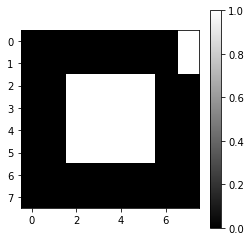

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# read an image file
x = np.zeros((8,8))
x[2:6,2:6] = 1
x[0:2,7:8] = 1

# plot image
plt.figure(figsize=(4,4))
plt.imshow(x,cmap='gray')
plt.colorbar()
plt.show()


(8, 8)


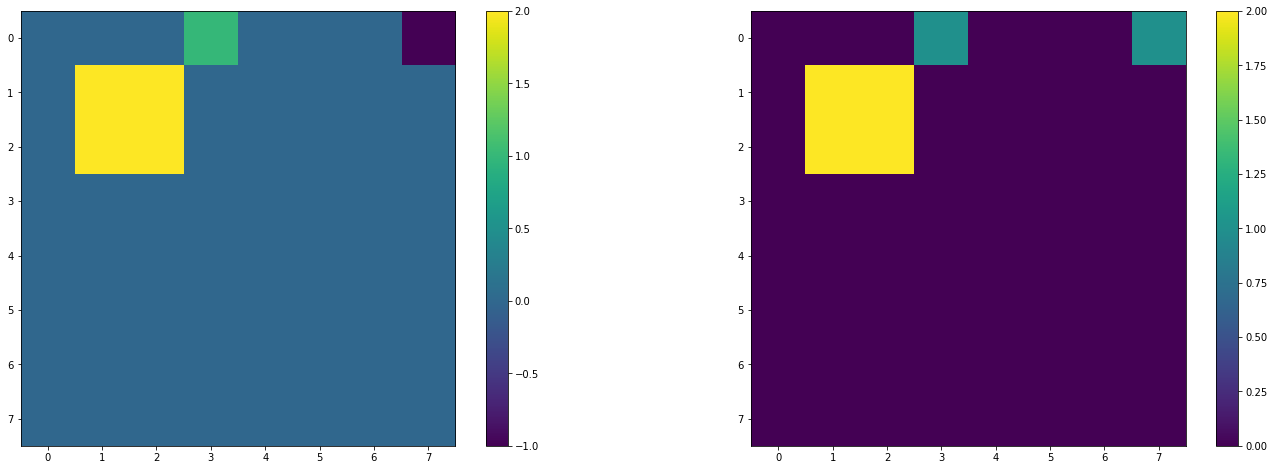

In [ ]:
# Only do decomposition once
level=1

# 2D Haar
coeffs = pywt.wavedec2(x, 'haar', level=level)

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

print(arr.shape)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(arr))
plt.colorbar()
plt.show()

This is the matrix C of coefficients if we just do sums and differences.  So the top coefficient is the coefficient of
\begin{align}
\begin{bmatrix}
1 & 1 & 0 & 0 & ... & 0\\
1 & 1 & 0 & 0 & ... & 0\\
0 & 0 & 0 & 0 & ... & 0\\
\vdots & \vdots & \vdots & \vdots & ... & \vdots\\
0 & 0 & 0 & 0 & ... & 0
\end{bmatrix}
\end{align}
This picks up the $2\times 2$ average of pixels.

The coefficient of the bottom right is the coefficient of
\begin{align}
\begin{bmatrix}
0 & ... & 0 & 0 & 0 & 0\\
\vdots & ... & \vdots & \vdots & \vdots & \vdots\\
0 & ... & 0 & 0 & 0 & 0\\
0 & ... & 0 & 0 & 1 & -1\\
0 & ... & 0 & 0 & -1 & 1
\end{bmatrix}
\end{align}
This picks up the $2\times 2$ diagonal differences of pixels.

The coefficient in the top right is the coefficient of
\begin{align}
\begin{bmatrix}
0 & ... & 0 & 0 & 1 & -1\\
0 & ... & 0 & 0 & 1 & -1\\
0 & ... & 0 & 0 & 0 & 0\\
\vdots & ... & \vdots & \vdots & \vdots & \vdots\\
0 & ... & 0 & 0 & 0 & 0
\end{bmatrix}
\end{align}
This picks up the $2\times 2$ vertical edges of pixels.

The coefficient in the bottom left is the coefficient of
\begin{align}
\begin{bmatrix}
0 & 0 & 0 & 0 & ... & 0\\
\vdots & \vdots & \vdots & \vdots & ... & \vdots\\
0 & 0 & 0 & 0 & ... & 0\\
1 & 1 & 0 & 0 & ... & 0\\
-1 & -1 & 0 & 0 & ... & 0
\end{bmatrix}
\end{align}
This picks up the $2\times 2$ horizontal edges of pixels.


## What if we take all levels?

(8, 8)


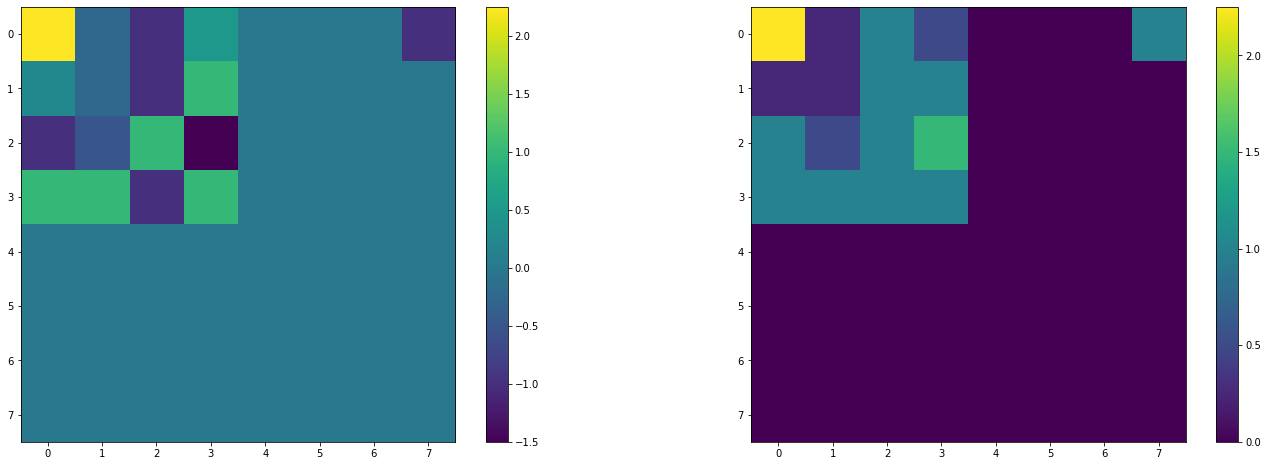

In [ ]:


# 2D Haar
coeffs = pywt.wavedec2(x, 'haar')

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

print(arr.shape)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(arr))
plt.colorbar()
plt.show()



## What if we remove a coefficient?

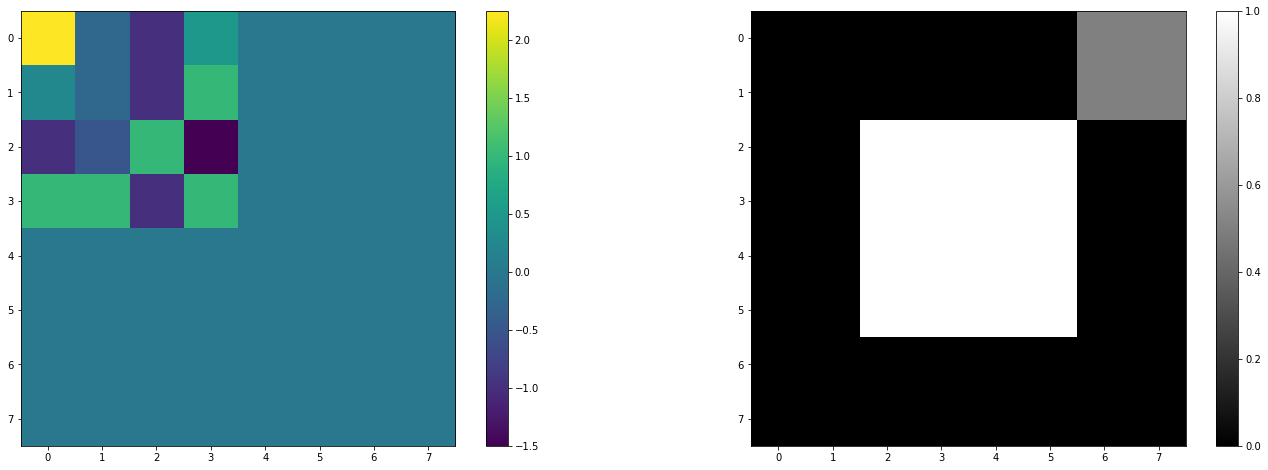

In [ ]:
arr[0,7] = 0
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

x_filtered = pywt.waverec2(coeffs_reconstruct, 'haar')

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(x_filtered,cmap='gray')
plt.colorbar()
plt.show()



# Let's take the Haar Decomposition of an Image!

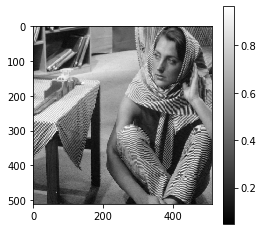

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# read an image file
image = plt.imread("barbara.png")

# convert image to grayscale
if np.size(image.shape) > 2:
    image = rgb2gray(image)

# crop image to interger multiple of 8x8
nrows, ncols = image.shape[0], image.shape[1]
if nrows % 8 > 0:
    image = image[0 : 8*int(nrows / 8),:]
if ncols % 8 > 0:
    image = image[:,0 : 8*int(ncols / 8)]
    
# plot image
plt.figure(figsize=(4,4))
plt.imshow(image,cmap='gray')
plt.colorbar()
plt.show()


## One level

(512, 512)


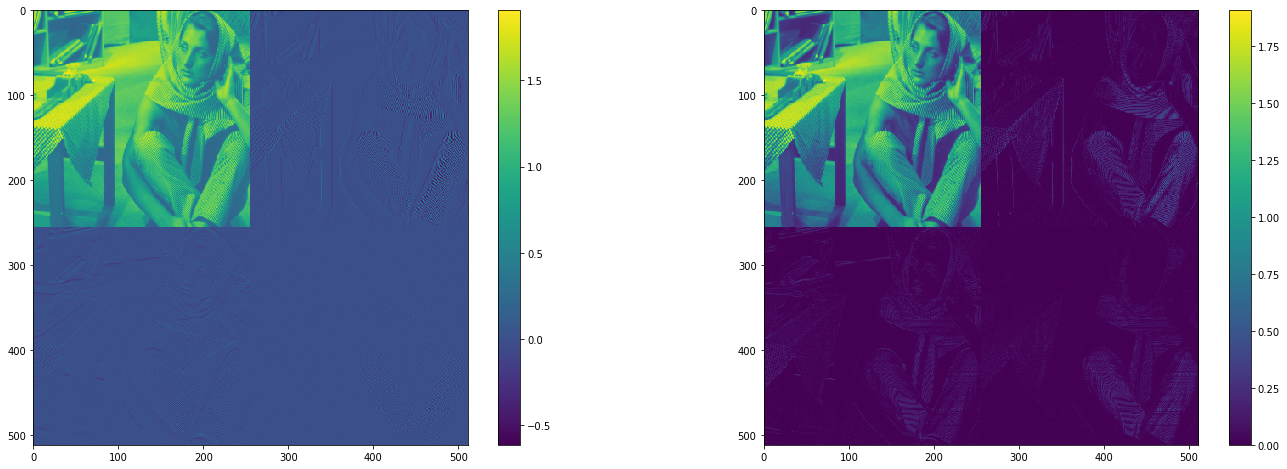

In [ ]:
# Only do decomposition once
level=1

# 2D Haar
coeffs = pywt.wavedec2(image, 'haar', level=level)

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

print(arr.shape)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(arr))
plt.colorbar()
plt.show()

## Multiple levels

(512, 512)


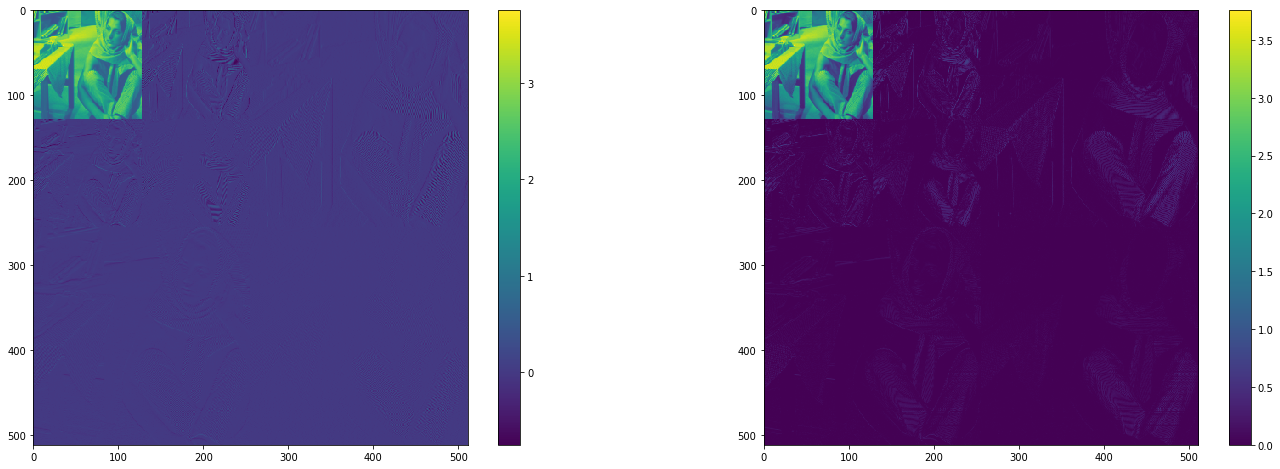

In [ ]:
# Only do decomposition once
level=2

# 2D Haar
coeffs = pywt.wavedec2(image, 'haar', level=level)

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

print(arr.shape)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(arr))
plt.colorbar()
plt.show()

## What if we take all levels

(512, 512)


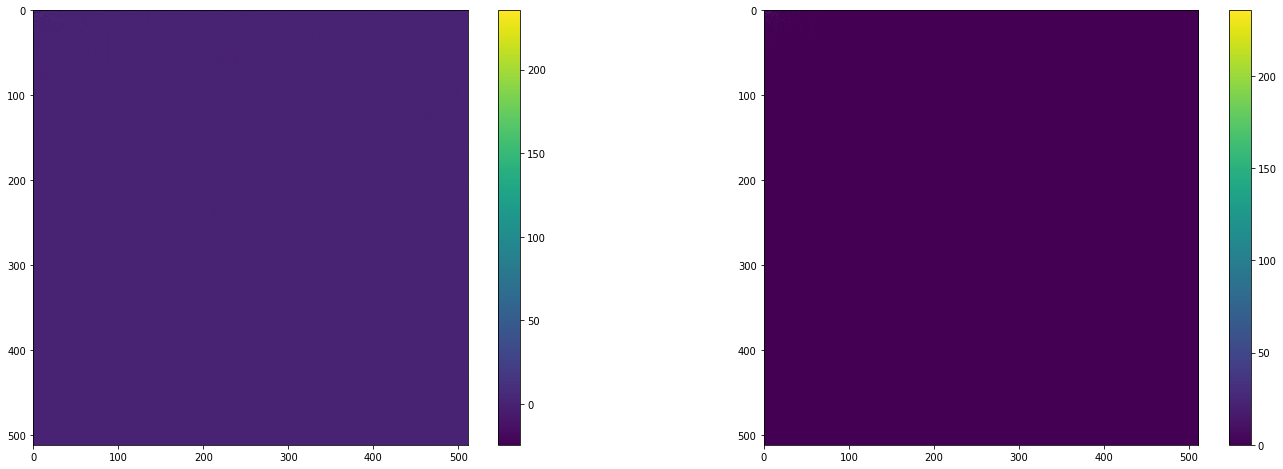

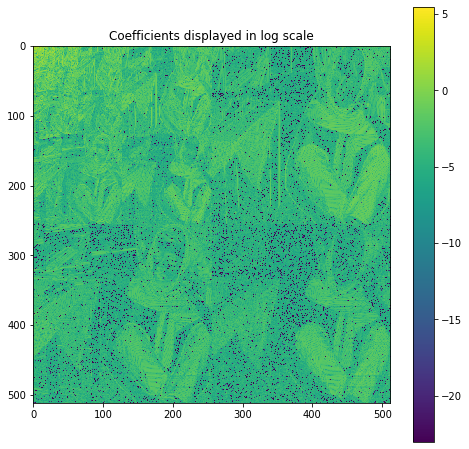

In [ ]:
# 2D Haar
coeffs = pywt.wavedec2(image, 'haar')

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')

print(arr.shape)


plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(arr)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(arr))
plt.colorbar()
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(np.log(np.abs(arr) + 1e-10))
plt.colorbar()
plt.title('Coefficients displayed in log scale')
plt.show()

## How many zeros are there?

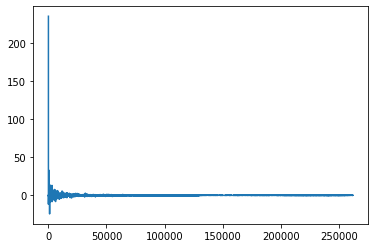

0.054500327


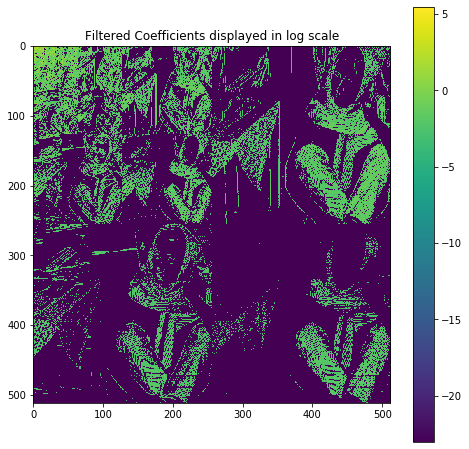

In [ ]:
# Make arr one large vector
arr_vec = arr.reshape(nrows*ncols,)
plt.figure()
plt.plot(arr_vec)
plt.show()

# Threshold
threshold = np.mean(np.abs(arr_vec))
print(threshold)
arr_vec[np.abs(arr_vec)<threshold] = 0

# Reconstruct
arr_reconstruct = arr_vec.reshape(nrows,ncols)
plt.figure(figsize=(8,8))
plt.imshow(np.log(np.abs(arr_reconstruct) + 1e-10))
plt.colorbar()
plt.title('Filtered Coefficients displayed in log scale')
plt.show()


0.23477554321289062


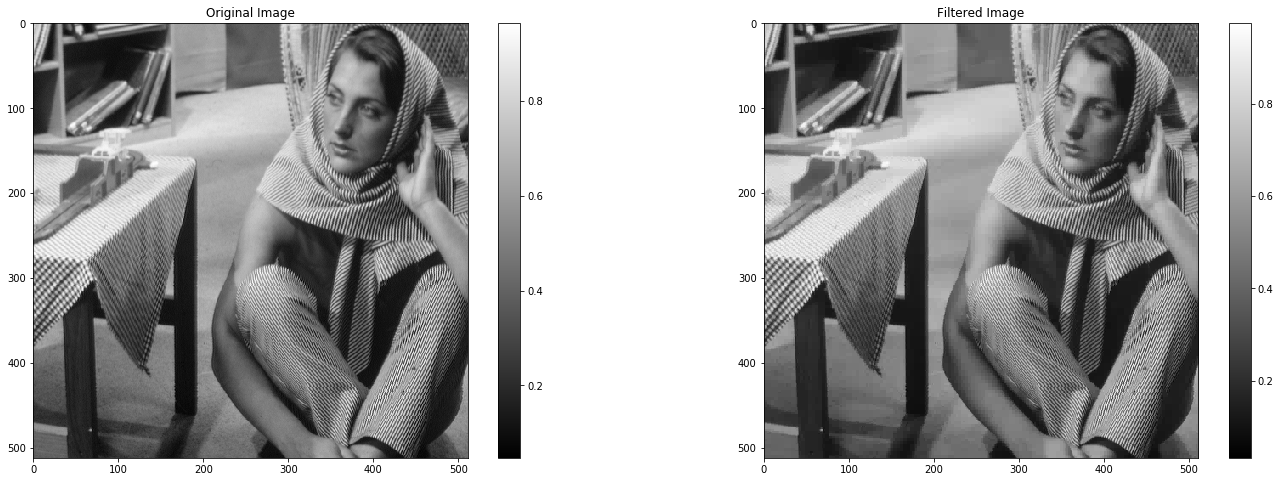

In [ ]:
# Number nonzero coefficients
fracNonZero = np.count_nonzero(arr_reconstruct)/(nrows*ncols)
print(fracNonZero)

coeffs_reconstruct = pywt.array_to_coeffs(arr_reconstruct, coeff_slices, output_format = 'wavedec2')
image_filter = pywt.waverec2(coeffs_reconstruct, 'haar')

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(image_filter,cmap='gray')
plt.title('Filtered Image')
plt.colorbar()
plt.show()

## What happens if we change threshold?

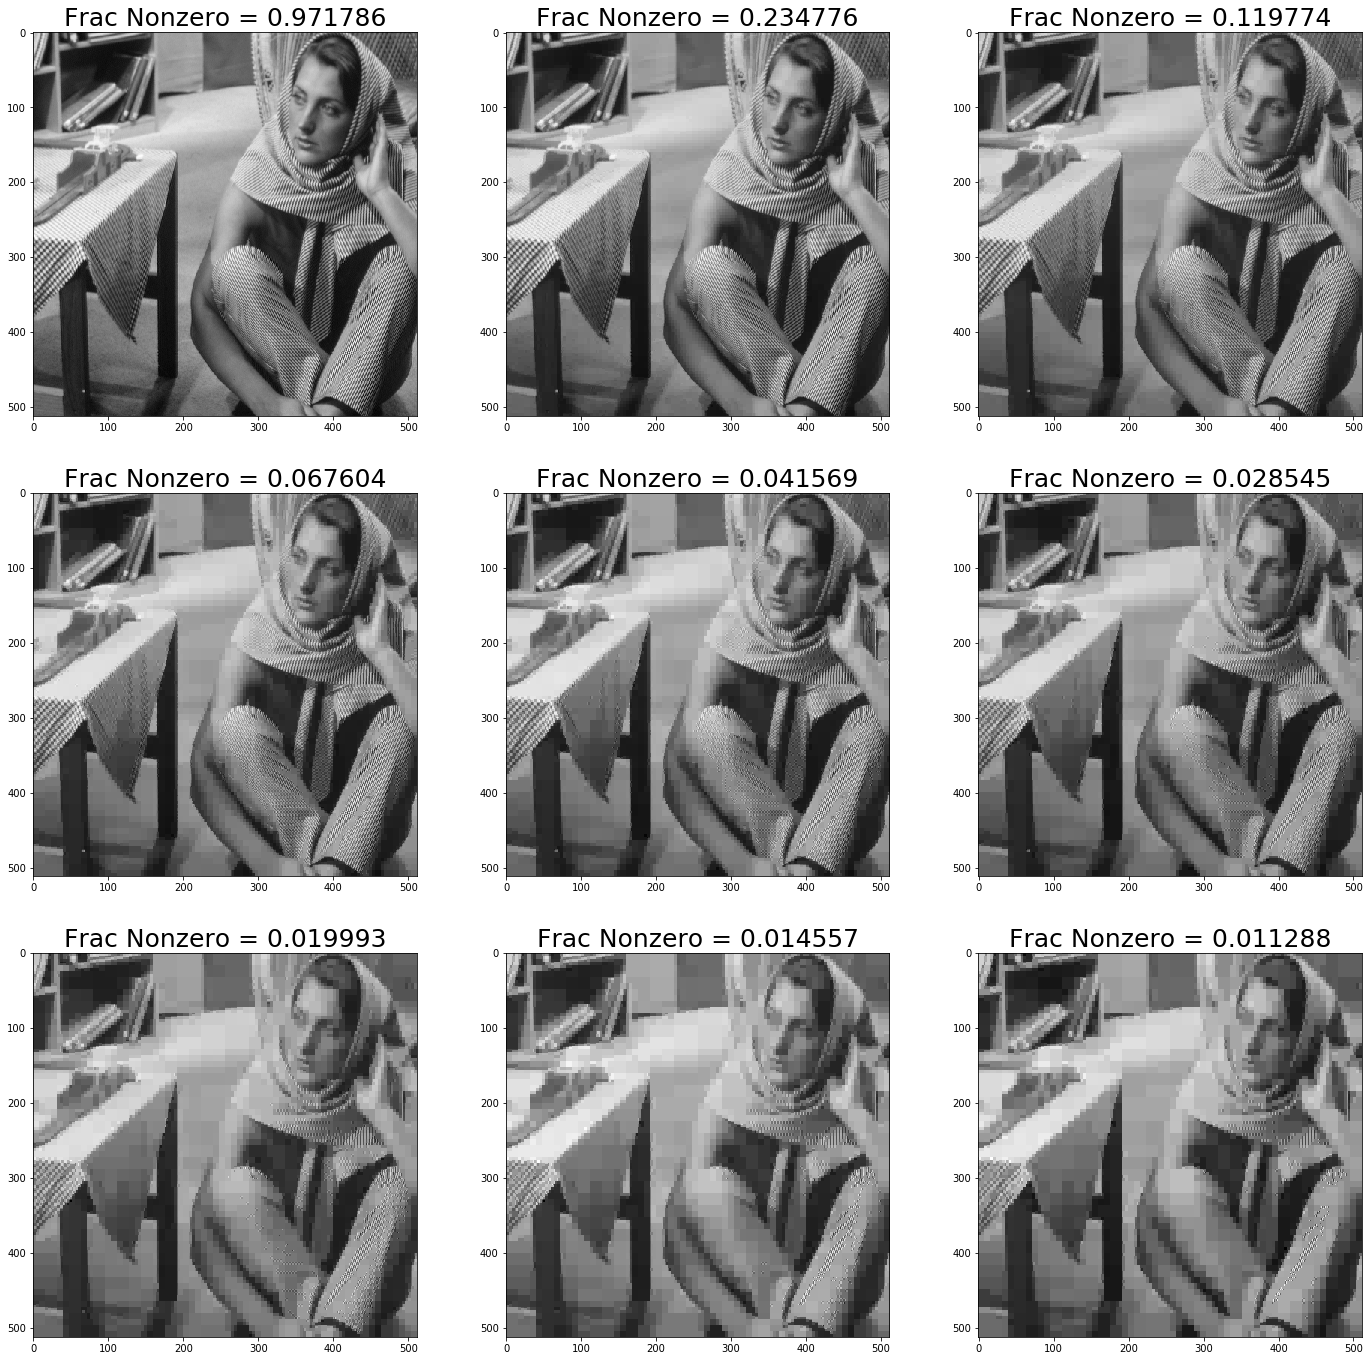

In [ ]:
plt.figure(figsize=(24,24))
for mult in range(9):
    coeffs = pywt.wavedec2(image, 'haar')

    # Turn into array and back
    arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    
    arr_vec = arr.reshape(nrows*ncols,)
    threshold = mult * np.mean(np.abs(arr_vec))
    arr_vec[np.abs(arr_vec)<threshold] = 0
    
    arr_reconstruct = arr_vec.reshape(nrows,ncols)

    fracNonZero = np.count_nonzero(arr_reconstruct)/(nrows*ncols)

    coeffs_reconstruct = pywt.array_to_coeffs(arr_reconstruct, coeff_slices, output_format = 'wavedec2')
    image_filter = pywt.waverec2(coeffs_reconstruct, 'haar')
    plt.subplot(3,3,mult+1)
    plt.imshow(image_filter,cmap='gray')
    plt.title('Frac Nonzero = %f' %fracNonZero,  fontsize=25)

## What happens if I zero out the one wavelet coefficient for $\phi \phi^T$

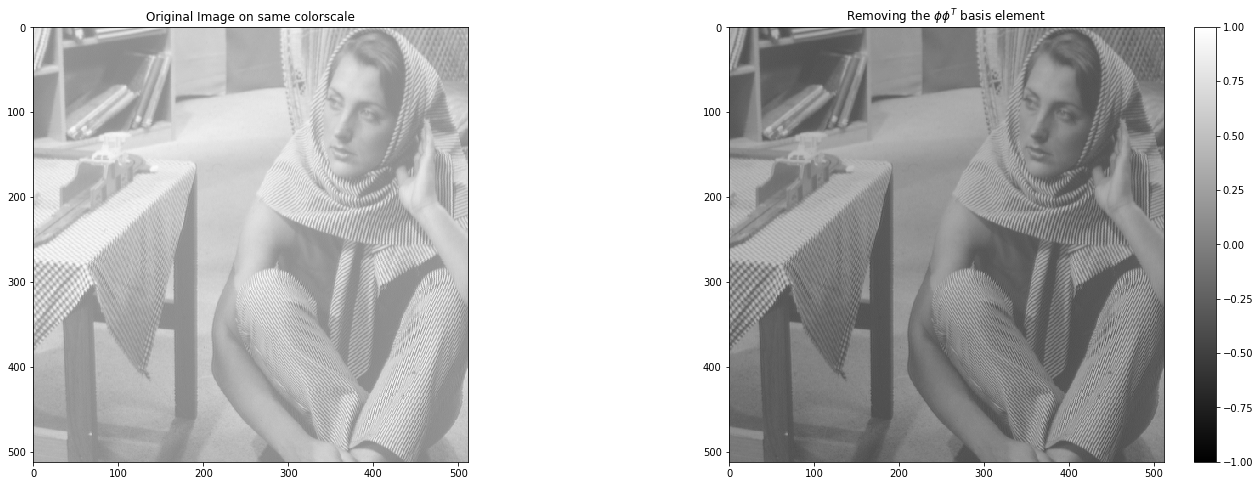

In [ ]:
# Haar Transform
coeffs = pywt.wavedec2(image, 'haar')

# Turn into array and back
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

# Zero out the phi phi^T coefficient
arr[0,0] = 0

coeffs_reconstruct = pywt.array_to_coeffs(arr, coeff_slices, output_format = 'wavedec2')
image_filter = pywt.waverec2(coeffs_reconstruct, 'haar')

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray', vmin = -1, vmax = 1)
plt.title('Original Image on same colorscale')
plt.subplot(1,2,2)
plt.imshow(image_filter,cmap='gray', vmin = -1, vmax = 1)
plt.title('Removing the $\phi \phi^T$ basis element')
plt.colorbar()
plt.show()